In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digit_data = load_digits()
dir(digit_data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

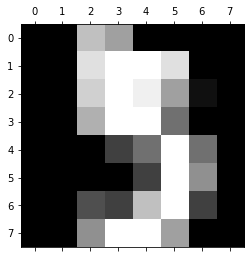

In [12]:
plt.gray()
plt.matshow(digit_data.images[5])

In [13]:
X = digit_data.data
y = digit_data.target

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [15]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)

SVC()

In [16]:
clf.score(X_test,y_test)

0.9888888888888889

In [17]:
truth = y_test
predicted = clf.predict(X_test)

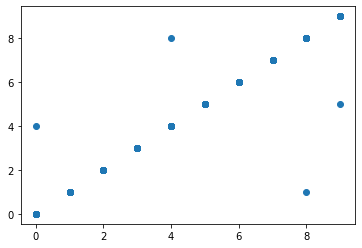

In [18]:
plt.scatter(truth,predicted)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth,predicted)
cm

array([[41,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 36]], dtype=int64)

Text(33.0, 0.5, 'Truth')

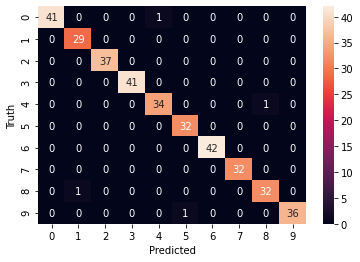

In [20]:
import seaborn as sn
sn.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#####  In machine learning, the hinge loss is a loss function used for training classifiers.The hinge loss is used for "maximum-margin" classification,most notably for support vector machines 

SVM doesn't support multiclass classification natively. It supports binary classification and separating data points into two classes

Read about SVM Hyper-parameters:
* ##### https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167

##### C :

सी पॅरामीटर प्रत्येक चुकीच्या वर्गीकरण केलेल्या डेटा पॉईंटसाठी दंड जोडतो. जर सी लहान असेल तर चुकीच्या वर्गवारीसाठी दंड कमी असेल म्हणून मोठ्या संख्येने चुकीच्या वर्गाच्या किंमतीवर मोठ्या फरकाने सीमेची निवड केली जाते. जर सी मोठा असेल तर एसव्हीएम उच्च दंडामुळे चुकीच्या श्रेणीतील उदाहरणे कमी करण्याचा प्रयत्न करतात ज्याचा परिणाम निर्णयाच्या सीमेला कमी फरकासह होतो. सर्व चुकीच्या वर्गाच्या उदाहरणांसाठी दंड समान नाही. It is directly proportional to the distance to decision boundary.

##### Kernel :
डेटा पॉइंट्स जे रेखीय विभाजनयोग्य नसतात कर्नल फंक्शन्सचा वापर करून रूपांतरित केले जातात जेणेकरून ते रेखीय विभाजनयोग्य बनतात. कर्नल फंक्शन एक प्रकारचे समानता उपाय आहे.


One of the commonly used kernel functions is radial basis function (RBF). Gamma parameter of RBF controls the distance of influence of a single training point. Low values of gamma indicates a large similarity radius which results in more points being grouped together. For high values of gamma, the points need to be very close to each other in order to be considered in the same group (or class). Therefore, models with very large gamma values tend to overfit.

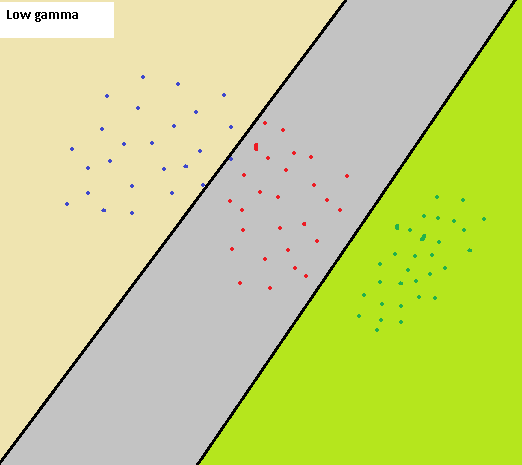
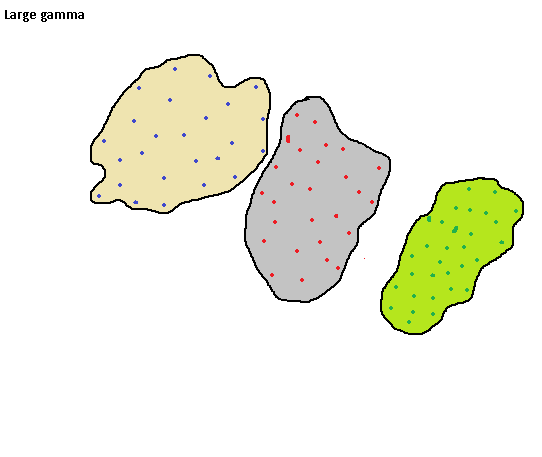

##### For a linear kernel, we just need to optimize the c parameter. However, if we want to use an RBF kernel, both c and gamma parameter need to optimized simultaneously. If gamma is large, the effect of c becomes negligible. If gamma is small, c affects the model just like how it affects a linear model. Typical values for c and gamma are as follows. However, specific optimal values may exist depending on the application:
* 0.0001 < gamma < 10
* 0.1 < c < 100